In [20]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Convolution2D, MaxPooling2D, Reshape

from keras.datasets import mnist
from keras.utils import to_categorical

import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train/255, X_test/255

In [21]:
n_classes = 10

In [22]:
y_train_hot = to_categorical(y_train, num_classes=n_classes)

In [23]:
y_test_hot = to_categorical(y_test, num_classes=n_classes)

In [24]:
in_layer = Input(shape=(28, 28))
reshape = Reshape(target_shape=(28, 28, 1))(in_layer)
conv = Convolution2D(filters=32, kernel_size=3)(reshape)
pool = MaxPooling2D()(conv)
conv1 = Convolution2D(filters=32, kernel_size=3)(pool)
pool1 = MaxPooling2D()(conv1)
flat = Flatten()(pool1)
d1 = Dense(400, activation="tanh")(flat)
d2 = Dense(100, activation="tanh")(d1)
out = Dense(10, activation="softmax")(d2)

In [25]:
model = Model(inputs=in_layer, outputs=out)

In [26]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0   

In [27]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [28]:
model.fit(X_train, y_train_hot, epochs=5, batch_size=1000)

Epoch 1/5
60000/60000 [==============================] - 13s 225us/step - loss: 0.4948 - accuracy: 0.8648
Epoch 2/5
60000/60000 [==============================] - 13s 216us/step - loss: 0.1148 - accuracy: 0.9676
Epoch 3/5
60000/60000 [==============================] - 12s 203us/step - loss: 0.0697 - accuracy: 0.9806
Epoch 4/5
60000/60000 [==============================] - 11s 184us/step - loss: 0.0511 - accuracy: 0.9860
Epoch 5/5
60000/60000 [==============================] - 10s 172us/step - loss: 0.0408 - accuracy: 0.9883


In [29]:
model.evaluate(X_test, y_test_hot, verbose=0)

[0.04365194276729599, 0.986299991607666]

In [49]:
m2 = Model(inputs=model.input, outputs=model.layers[5].output)

In [50]:
m2.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
_________________________________________________________

In [51]:
out = m2.predict(X_train)

In [52]:
out.shape

(60000, 5, 5, 32)

In [53]:
selected_batch = out[0]

In [54]:
selected_batch.shape

(5, 5, 32)

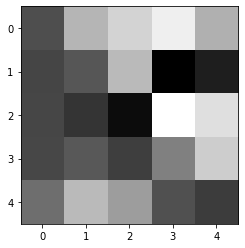

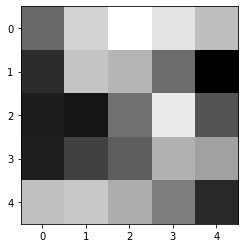

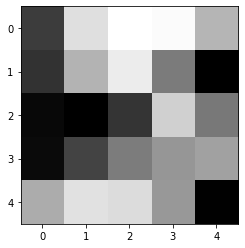

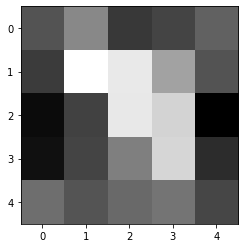

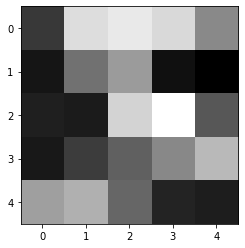

In [ ]:
for i in range(10):
    plt.figure()
    plt.imshow(selected_batch[:, :, i], cmap="gray")
    plt.show()